In [1]:
import matplotlib.pyplot as plt
import numpy as np

from helpers.utils import visualize, read_pickle_file

In [2]:
epochs = 15

In [3]:
#np.linspace(0.005, 0.0001,10)

In [4]:
model_ln_keras_history_1 = read_pickle_file ('./logs/cnn/ln_Keras_cifar10_batchSize_1/model_ln_keras_history_1.pickle')
model_ln_keras_test_history_1 = read_pickle_file ('./logs/cnn/ln_Keras_cifar10_batchSize_1/model_ln_keras_test_history_1.pickle')

model_bn_keras_history_1 = read_pickle_file ('./logs/cnn/bn_Keras_cifar10_batchSize_1/model_bn_keras_history_1.pickle')
model_bn_keras_test_history_1 = read_pickle_file ('./logs/cnn/bn_Keras_cifar10_batchSize_1/model_bn_keras_test_history_1.pickle')

model_bln_keras_history_1 = read_pickle_file ('./logs/cnn/bln_layer_cifar10_batchSize_1/model_bln_keras_history_1.pickle')
model_bln_keras_test_history_1 = read_pickle_file ('./logs/cnn/bln_layer_cifar10_batchSize_1/model_bln_keras_test_history_1.pickle')

In [6]:
model_ln_keras_history_25 = read_pickle_file ('./logs/cnn/ln_Keras_cifar10_batchSize_25/model_ln_keras_history_25.pickle')
model_ln_keras_test_history_25 = read_pickle_file ('./logs/cnn/ln_Keras_cifar10_batchSize_25/model_ln_keras_test_history_25.pickle')

model_bn_keras_history_25 = read_pickle_file ('./logs/cnn/bn_Keras_cifar10_batchSize_25/model_bn_keras_history_25.pickle')
model_bn_keras_test_history_25 = read_pickle_file ('./logs/cnn/bn_Keras_cifar10_batchSize_25/model_bn_keras_test_history_25.pickle')

model_bln_keras_history_25 = read_pickle_file ('./logs/cnn/bln_layer_cifar10_batchSize_25/model_bln_keras_history_25.pickle')
model_bln_keras_test_history_25 = read_pickle_file ('./logs/cnn/bln_layer_cifar10_batchSize_25/model_bln_keras_test_history_25.pickle')


# Make Comaprison
#### Layer Normalization, Batch Normalization and Batch Layer Normalization

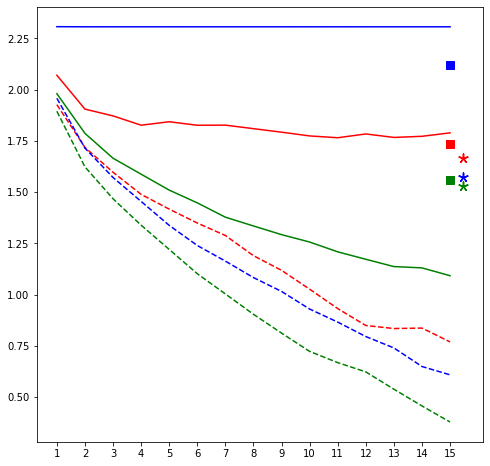

In [8]:

# summarize history for accuracy

fig = plt.figure(figsize=(8, 8))       # size in inches
plt.plot(model_ln_keras_history_25['loss'], '--', linewidth=1.5, color="red")
plt.plot(model_bn_keras_history_25['loss'], '--', linewidth=1.5, color="blue")
plt.plot(model_bln_keras_history_25['loss'], '--', linewidth=1.5, color="green")


plt.plot(model_ln_keras_history_1['loss'],  linewidth=1.5, color="red")
plt.plot(model_bn_keras_history_1['loss'], linewidth=1.5, color="blue")
plt.plot(model_bln_keras_history_1['loss'],  linewidth=1.5, color="green")




plt.scatter(14.0, model_ln_keras_test_history_1[0], s=80,  marker="s", color="red")
plt.scatter(14.0, model_bn_keras_test_history_1[0], s=80,  marker="s", color="blue")
plt.scatter(14.0, model_bln_keras_test_history_1[4][1][0], s=80,  marker="s", color="green")

plt.scatter(14.45, model_ln_keras_test_history_25[0], s=80,  marker=(5, 2), color="red")
plt.scatter(14.45, model_bn_keras_test_history_25[0], s=80,  marker=(5, 2), color="blue")
plt.scatter(14.45, model_bln_keras_test_history_25[0][1][0], s=80,  marker=(5, 2), color="green")


plt.xticks(np.arange(epochs), np.arange(1, epochs+1, 1))
#plt.legend(['Layer Normalization', 'Batch Normalization','Batch Layer Normalization' ], loc='lower left')
ax = plt.gca()
plt.savefig('./Images/cnns_loss.svg',  bbox_inches='tight')
plt.show()



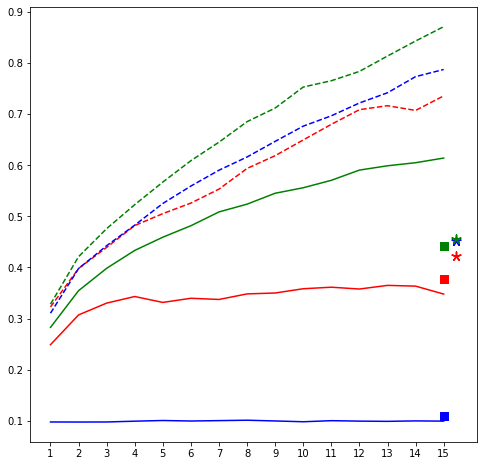

In [9]:

# summarize history for accuracy

fig = plt.figure(figsize=(8, 8))       # size in inches
plt.plot(model_ln_keras_history_25['categorical_accuracy'], '--', linewidth=1.5, color="red")
plt.plot(model_bn_keras_history_25['categorical_accuracy'], '--', linewidth=1.5, color="blue")
plt.plot(model_bln_keras_history_25['categorical_accuracy'], '--', linewidth=1.5, color="green")


plt.plot(model_ln_keras_history_1['categorical_accuracy'],  linewidth=1.5, color="red")
plt.plot(model_bn_keras_history_1['categorical_accuracy'], linewidth=1.5, color="blue")
plt.plot(model_bln_keras_history_1['categorical_accuracy'],  linewidth=1.5, color="green")


plt.scatter(14.0, model_ln_keras_test_history_1[1], s=80,  marker="s", color="red")
plt.scatter(14.0, model_bn_keras_test_history_1[1], s=80,  marker="s", color="blue")
plt.scatter(14.0, model_bln_keras_test_history_1[4][1][1], s=80,  marker="s", color="green")


plt.scatter(14.45, model_ln_keras_test_history_25[1], s=80,  marker=(5, 2), color="red")
plt.scatter(14.45, model_bn_keras_test_history_25[1], s=80,  marker=(5, 2), color="blue")
plt.scatter(14.45, model_bln_keras_test_history_25[0][1][1], s=80,  marker=(5, 2), color="green")



plt.xticks(np.arange(epochs), np.arange(1, epochs+1, 1))
#plt.legend(['Layer Normalization', 'Batch Normalization','Batch Layer Normalization' ], loc='lower left')
plt.savefig('./Images/cnns_acc.svg',  bbox_inches='tight')
plt.show()



# The behavior of The Numerator of Equation. 7

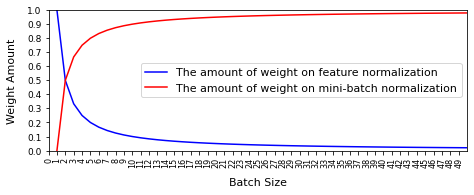

In [14]:
f,b = [], []
for i in range(50):
    b.append([i+1,1- (1/(i+1))+.0001])
    f.append([i+1,1/(i+1)-.0001])

f =  np.array(f)#shape
b =  np.array(b)#shape

fig, ax = plt.subplots(figsize=(7.5, 2.5))
ax.plot(f[:,:1], f[:,1:], color='blue',linewidth=1.5)
ax.plot(b[:,:1], b[:,1:], color='red',linewidth=1.5)
ax.yaxis.labelpad = 10
ax.xaxis.labelpad = 10

plt.xlim([0, 50])
plt.ylim([0, 1])
plt.xticks(np.arange(0, 50, 1.0))
plt.xticks(fontsize=8, rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=9)

plt.xlabel('Batch Size',  fontsize=11)
fig.subplots_adjust(bottom=0.1)
plt.ylabel('Weight Amount',  fontsize=11)
plt.legend(["The amount of weight on feature normalization",   "The amount of weight on mini-batch normalization"]
           , loc='center right', fontsize=11)
plt.savefig('./Images/numerator.svg',  bbox_inches='tight')

plt.show()
